In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv(r"C:\Users\Pawan\Downloads\archive (1)\insurance.csv")

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

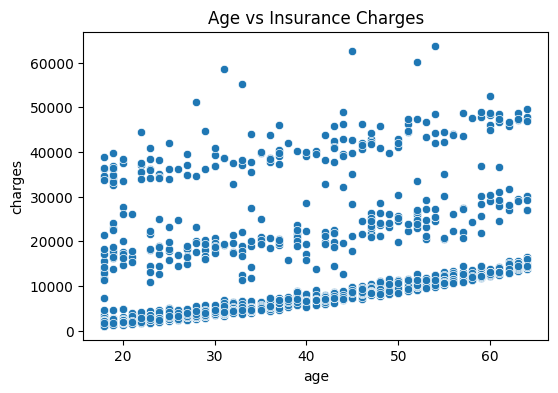

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Insurance Charges")
plt.show()


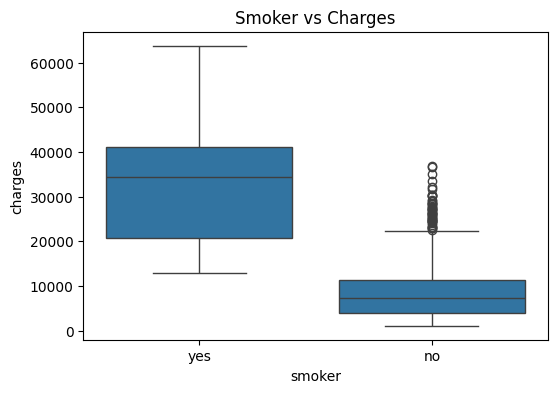

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Charges")
plt.show()


In [24]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [26]:
X = df.drop("charges", axis=1)
y = df["charges"]


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4181.194473753654
MSE: 33596915.85136146
R2 Score: 0.7835929767120723


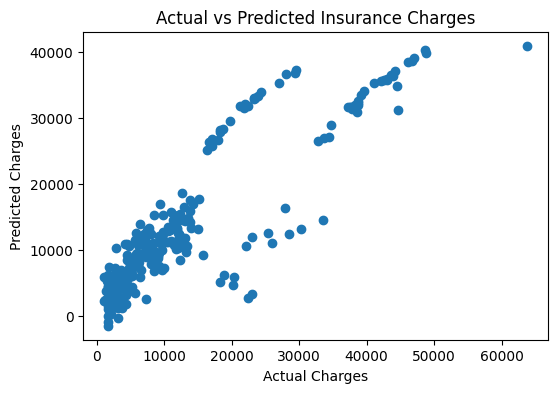

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()


In [34]:
new_person = pd.DataFrame(
    [[30, 25, 1, 1, 0, 0, 1, 0]],  # values
    columns=X.columns              # SAME ORDER AS TRAINING DATA
)

prediction = model.predict(new_person)
print("Predicted Insurance Cost:", prediction[0])


Predicted Insurance Cost: 3954.188718647265


In [33]:
X.columns


Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='str')

In [35]:
# Taking user input
age = int(input("Enter age: "))
bmi = float(input("Enter BMI value: "))
children = int(input("Enter number of children: "))

gender = input("Gender (male/female): ").lower()
smoker = input("Smoker? (yes/no): ").lower()
region = input("Region (northwest/northeast/southeast/southwest): ").lower()

# Converting inputs into model format
sex_male = 1 if gender == "male" else 0
smoker_yes = 1 if smoker == "yes" else 0

region_northwest = 1 if region == "northwest" else 0
region_southeast = 1 if region == "southeast" else 0
region_southwest = 1 if region == "southwest" else 0

# Creating DataFrame in SAME ORDER as training
new_data = pd.DataFrame([[age, bmi, children, sex_male, smoker_yes,
                          region_northwest, region_southeast, region_southwest]],
                        columns=X.columns)

# Prediction
prediction = model.predict(new_data)

print("\n💰 Predicted Medical Insurance Cost: ", round(prediction[0], 2))


Enter age:  21
Enter BMI value:  21.3
Enter number of children:  0
Gender (male/female):  male
Smoker? (yes/no):  no
Region (northwest/northeast/southeast/southwest):  north



💰 Predicted Medical Insurance Cost:  626.75
